In [1]:
# pip install opencv-python opencv-python-headless

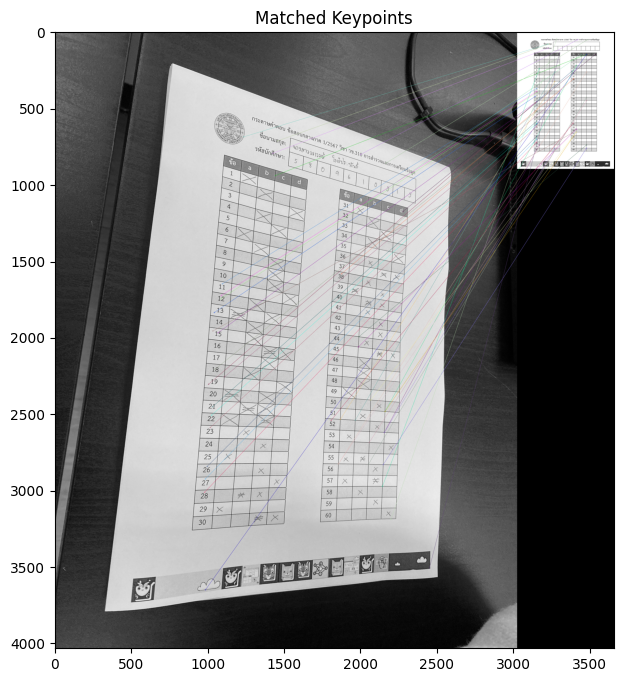

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input image and reference (standard) image
input_image = cv2.imread('input2.jpeg', cv2.IMREAD_GRAYSCALE)
reference_image = cv2.imread('ref.png', cv2.IMREAD_GRAYSCALE)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Find keypoints and descriptors in both images
keypoints_input, descriptors_input = sift.detectAndCompute(input_image, None)
keypoints_reference, descriptors_reference = sift.detectAndCompute(reference_image, None)

# Use the brute-force matcher to find matches between the keypoints
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptors_input, descriptors_reference)

# Sort the matches based on distance (best matches first)
matches = sorted(matches, key=lambda x: x.distance)

# Draw the matches for visualization (optional)
matched_image = cv2.drawMatches(input_image, keypoints_input, reference_image, keypoints_reference, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(8,8))
plt.imshow(matched_image)
plt.title('Matched Keypoints')
plt.show()

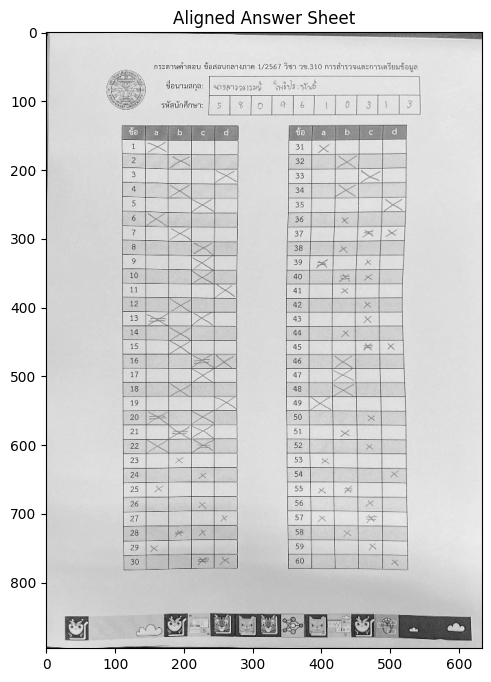

True

In [3]:
# Extract location of good matches
points_input = np.float32([keypoints_input[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
points_reference = np.float32([keypoints_reference[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

# Estimate the homography matrix
H, mask = cv2.findHomography(points_input, points_reference, cv2.RANSAC, 5.0)

# Warp the input image to align with the reference image
height, width = reference_image.shape
aligned_image = cv2.warpPerspective(input_image, H, (width, height))

# Show the aligned image
plt.figure(figsize=(8,8))
plt.imshow(aligned_image, cmap='gray')
plt.title('Aligned Answer Sheet')
plt.show()

# Save the aligned image (optional)
cv2.imwrite('output.jpg', aligned_image)